In [1]:
#Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Membaca dataset
data = pd.read_csv("stroke.csv")

In [3]:
# Preprocessing data
data = data.dropna()  # Menghapus baris dengan nilai kosong/null

In [4]:
# Memisahkan atribut dan label
X = data.drop("stroke", axis=1)
y = data["stroke"]

In [5]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown
3,Male,57.0,0,1,No,Govt_job,Urban,217.08,33.808410,Unknown
4,Male,58.0,0,0,Yes,Private,Rural,189.84,31.378534,Unknown


In [7]:
X.bmi.unique()

array([31.55560242, 30.24293672, 30.69895144, 33.8084096 , 31.37853385,
       33.48456809, 30.04254516, 28.31827337, 28.39789267, 29.13978024,
       31.60231714, 29.31669184, 27.95491223, 30.49110683, 29.2929531 ,
       30.00388075, 30.19957057, 28.20206936, 32.12036908, 29.21083396,
       28.07047196, 29.86377495, 29.58332324, 27.9718569 , 27.94089228,
       28.94574986, 18.71925975, 29.79052812, 28.75985626, 27.08627617,
       27.28212232, 28.08147438, 32.94704544, 27.24339629, 28.73640015,
       31.68403147, 30.76368341, 29.7023726 , 33.07902302, 29.97021868,
       30.86316293, 33.73757621, 30.06680535, 31.69708599, 29.9973018 ,
       31.19814012, 29.85419033, 20.01842736, 33.11724646, 28.98284356,
       26.42080738, 29.01650428, 29.78959992, 26.99728227, 28.38347787,
       30.37530703, 22.56279754, 30.19632034, 18.89675834, 33.74964927,
       29.61260364, 28.59657852, 20.50813017, 31.6065707 , 32.27387095,
       31.89971212, 27.41131447, 29.87649092, 28.54569321, 27.17

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Memisahkan atribut kategorikal dan angka untuk data train
categorical_data_train = X_train[['gender', 'ever_married', 'work_type', 
                      'Residence_type', 'smoking_status']]

numerical_data_train = X_train[['age', 'hypertension', 'heart_disease',
                    'avg_glucose_level', 'bmi']]

# menggabungkan data train
X_train_final = pd.concat([categorical_data_train, numerical_data_train], axis=1)


# Memisahkan atribut kategorikal dan angka untuk data test
categorical_data_test = X_test[['gender', 'ever_married', 'work_type', 
                      'Residence_type', 'smoking_status']]

numerical_data_test = X_test[['age', 'hypertension', 'heart_disease',
                    'avg_glucose_level', 'bmi']]

# menggabungkan data test
X_test_final = pd.concat([categorical_data_test, numerical_data_test], axis=1)

# mengambil value dari kolom
cat_col = categorical_data_train.columns.values
num_col = numerical_data_train.columns.values

# membuat pipeline data kategori
categorical_pipe = Pipeline([
    ('ordinal_encoder', OneHotEncoder())
    ])

# membuat pipeline data angka
numerical_pipe = Pipeline([
    ('numerical_encode', StandardScaler())
    ])

# membuat pipeline model SVM dengan kernel polynomial
model_pipe = Pipeline([
    ('model_rf', SVC(kernel='poly', random_state=89))
    ])

# menggabungkan semua pipeline
preprocess = ColumnTransformer([
    ('cat', categorical_pipe, cat_col),
    ('num', numerical_pipe, num_col)
    ])


pipe = Pipeline(steps=[('preprocess', preprocess), ('svc', model_pipe)])

In [9]:
#Cross-Validation GridSearchCV
from sklearn.model_selection import GridSearchCV

# Membuat dictionary berisi parameter yang akan dicoba pada SVM
param_grid = {
    'svc__model_rf__C': [0.1, 1, 10],
    'svc__model_rf__gamma': [0.1, 0.01, 0.001],
    'svc__model_rf__degree': [2, 3, 4]
}

# Membuat objek GridSearchCV dengan pipeline dan parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Melakukan fitting pada data latih dengan GridSearchCV
grid_search.fit(X_train_final, y_train)

# Mendapatkan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Melakukan prediksi dengan model terbaik pada data uji
y_pred = best_model.predict(X_test_final)

# Menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9047619047619048


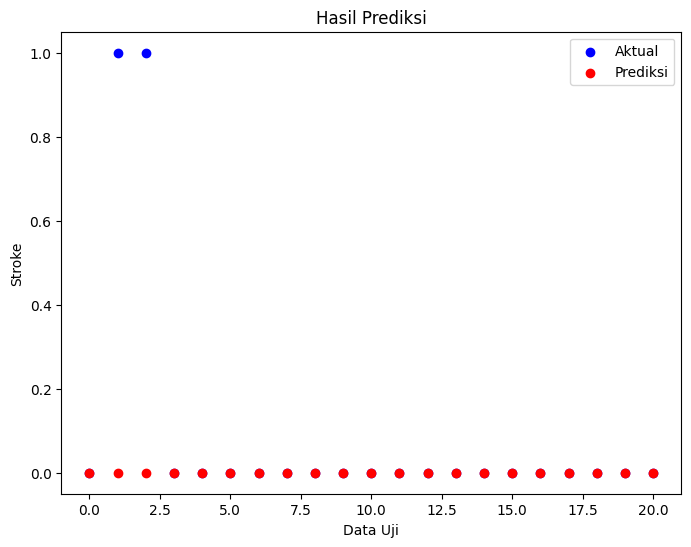

In [10]:
# Memvisualisasikan hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Aktual')
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Prediksi')
plt.title('Hasil Prediksi')
plt.xlabel('Data Uji')
plt.ylabel('Stroke')
plt.legend()
plt.show()

In [11]:
# Menyimpan model terbaik
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)